In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random
from sklearn.linear_model import LinearRegression
%matplotlib inline
os.chdir("Files")

In [7]:
sns.set(style='whitegrid',context='notebook')
filename = "TransposedSales.csv"
df = pd.read_csv(filename, index_col = 0)
df.head()

,Uncategorized,Beverages,Board Games,Bottled Beverages,Candy,Canned Beverages,Card Gaming Accessories,Event Tickets,Food,Glass Bottled Soda,...,Venue Fee,Birthdays,D&D,Dragon Ball Z,Clothing,Star Wars,Miniatures,Video Gaming,Figures And Models,WarMachine
Category,,,,,,,,,,,,,,,,,,,,,
6/1/2015,0.00000,0.0045,0.13985,0.06491,0.00250,0.0090,0.00799,0.01,0.03448,0.026,...,0,0,0,0,0,0,0,0,0,0
6/2/2015,0.01703,0.0020,0.00000,0.09296,0.00630,0.0430,0.00000,0.00,0.06214,0.080,...,0,0,0,0,0,0,0,0,0,0
6/3/2015,0.00350,0.0000,0.05999,0.07796,0.00630,0.0580,0.00000,0.02,0.06529,0.056,...,0,0,0,0,0,0,0,0,0,0
6/4/2015,0.00200,0.0000,0.00000,0.06095,0.00520,0.0465,0.15891,0.36,0.06566,0.053,...,0,0,0,0,0,0,0,0,0,0
6/5/2015,0.01999,0.0000,0.00000,0.10846,0.00555,0.0245,0.00000,0.27,0.06348,0.071,...,0,0,0,0,0,0,0,0,0,0


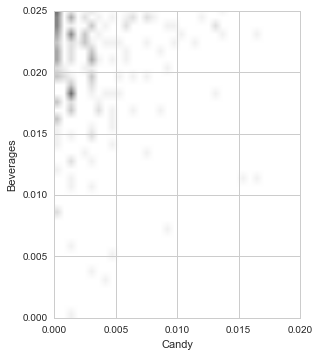

In [61]:

# Generate some test data
x = df['Candy']
y = df['Beverages']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=40)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap, extent=extent, aspect = 'equal')
plt.axis([0, .02, 0, .025])
plt.xlabel('Candy')
plt.ylabel('Beverages')
plt.show()

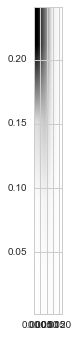

In [5]:

# Generate some test data


heatmap, xedges, yedges = np.histogram2d(x, y, bins=4)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap, extent=extent)
plt.show()

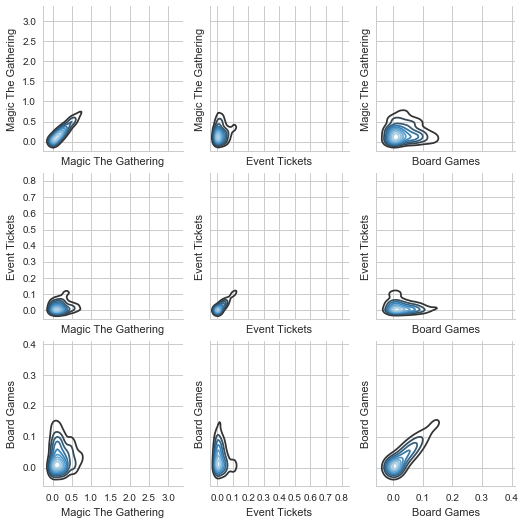

In [9]:
iris = sns.load_dataset("iris")

g = sns.PairGrid(df[cols])
#g = g.map(plt.scatter)
g = g.map(sns.kdeplot, cmap="Blues_d")
xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

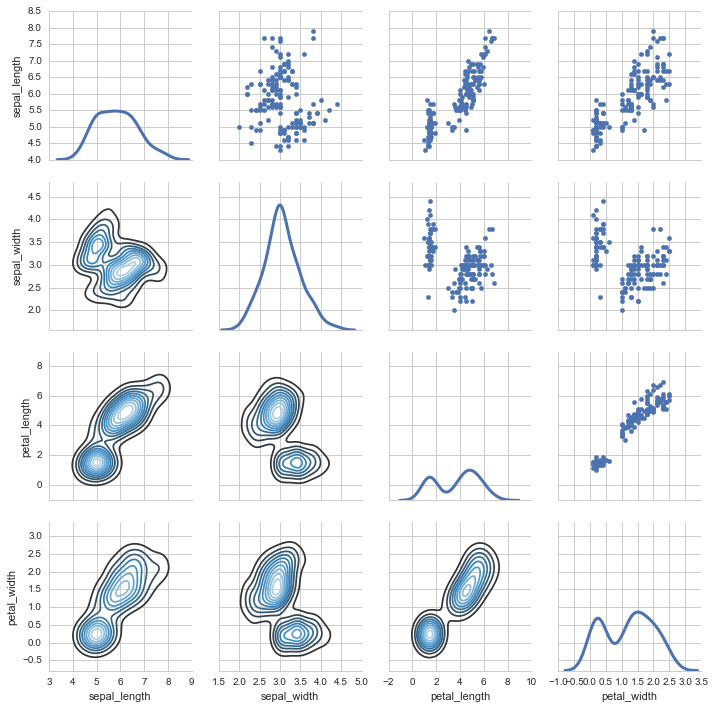

In [10]:
g = sns.PairGrid(iris)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)